## Data Wrangling Rent Prices by Zipcode
from Zillow public data

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#change directory to get data
path= '/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/raw'
os.chdir(path)

In [3]:
#load rental data
df_rents = pd.read_csv('Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [4]:
df_rents

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,61639,10025,1,"New York, NY",2971.0,2984.0,2997.0,3010.0,3023.0,3036.0,...,3250.0,3237.0,3216.0,3194.0,3172.0,3149.0,3125.0,3102.0,3076.0,3049.0
1,84654,60657,2,"Chicago, IL",1561.0,1567.0,1572.0,1577.0,1582.0,1587.0,...,1804.0,1803.0,1801.0,1798.0,1795.0,1792.0,1789.0,1786.0,1782.0,1778.0
2,61637,10023,3,"New York, NY",3145.0,3154.0,3162.0,3170.0,3177.0,3184.0,...,3359.0,3348.0,3329.0,3310.0,3291.0,3270.0,3249.0,3228.0,3205.0,3182.0
3,91982,77494,4,"Houston, TX",1790.0,1793.0,1797.0,1800.0,1803.0,1806.0,...,1803.0,1804.0,1806.0,1808.0,1809.0,1811.0,1813.0,1814.0,1816.0,1818.0
4,84616,60614,5,"Chicago, IL",1760.0,1765.0,1770.0,1775.0,1780.0,1785.0,...,2046.0,2046.0,2043.0,2041.0,2039.0,2036.0,2033.0,2031.0,2027.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,2110,9469,"Boston, MA",4266.0,4260.0,4254.0,4248.0,NaN,4239.0,...,4654.0,4620.0,4575.0,NaN,NaN,4436.0,4386.0,4336.0,4281.0,4226.0
3239,66128,20004,9592,"Washington, DC",NaN,NaN,2271.0,2278.0,NaN,2290.0,...,2488.0,2492.0,2496.0,2499.0,2503.0,2506.0,2509.0,2512.0,2515.0,2518.0
3240,399647,80951,9634,"Colorado Springs, CO",NaN,1233.0,1237.0,1242.0,1246.0,1250.0,...,1621.0,1626.0,NaN,1635.0,1640.0,1646.0,1651.0,1656.0,1662.0,1667.0
3241,62311,11964,10014,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,...,16028.0,NaN,NaN,15873.0,NaN,NaN,15728.0,NaN,NaN,NaN


### Data Definition

In [5]:
#df_rents.info()

In [6]:
df_rents.dtypes

RegionID        int64
RegionName      int64
SizeRank        int64
MsaName        object
2014-01       float64
               ...   
2020-05       float64
2020-06       float64
2020-07       float64
2020-08       float64
2020-09       float64
Length: 85, dtype: object

In [7]:
df_rents.describe()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
count,3243.000000,3243.000000,3243.000000,2364.000000,2462.000000,2475.000000,2737.000000,2846.000000,2929.000000,2966.000000,...,3180.000000,3199.000000,3187.000000,3191.000000,3167.000000,3170.000000,3185.000000,3181.000000,3176.000000,3175.000000
mean,85616.164662,53784.649090,2668.007092,1520.853215,1447.351747,1450.108283,1484.118378,1519.340126,1490.326050,1534.293999,...,1832.883019,1849.924977,1840.751804,1847.084926,1857.404168,1831.263722,1849.946939,1877.163156,1860.797859,1843.268976
std,42414.118571,30954.548087,1908.083875,1956.537788,1334.171899,1344.144175,1422.938190,1802.501556,1269.719191,1732.660106,...,1096.894195,1351.323832,1176.563118,1115.353814,1336.533613,818.316132,993.692583,1404.795647,1190.472788,809.790750
min,58362.000000,1432.000000,1.000000,412.000000,516.000000,522.000000,556.000000,551.000000,553.000000,521.000000,...,600.000000,603.000000,686.000000,608.000000,691.000000,613.000000,615.000000,617.000000,619.000000,622.000000
25%,70451.500000,29402.000000,1103.500000,1067.500000,1059.250000,1060.500000,1084.000000,1086.000000,1091.000000,1099.250000,...,1382.000000,1386.500000,1388.000000,1394.000000,1400.000000,1404.000000,1406.000000,1411.000000,1416.000000,1421.000000
50%,79124.000000,48220.000000,2360.000000,1287.000000,1280.000000,1284.000000,1303.000000,1312.000000,1321.000000,1326.500000,...,1640.500000,1644.000000,1646.000000,1649.000000,1652.000000,1658.000000,1662.000000,1663.000000,1669.000000,1671.000000
75%,95042.500000,85274.500000,3906.500000,1651.000000,1645.000000,1635.500000,1670.000000,1676.750000,1699.000000,1715.750000,...,2085.000000,2086.500000,2087.500000,2091.500000,2086.000000,2096.750000,2103.000000,2103.000000,2100.000000,2107.500000
max,753844.000000,99208.000000,10262.000000,52816.000000,44606.000000,45483.000000,46360.000000,54209.000000,54526.000000,54842.000000,...,38017.000000,38257.000000,36852.000000,36319.000000,40006.000000,27419.000000,30096.000000,41864.000000,42489.000000,27156.000000


In [8]:
df_rents.nunique()

RegionID      3243
RegionName    3243
SizeRank      2999
MsaName        101
2014-01       1246
              ... 
2020-05       1612
2020-06       1632
2020-07       1591
2020-08       1588
2020-09       1575
Length: 85, dtype: int64

In [9]:
df_rents['2020-09'].value_counts(normalize=True)*100

1667.0    0.283465
1606.0    0.283465
2058.0    0.220472
1364.0    0.220472
1477.0    0.220472
            ...   
4470.0    0.031496
2533.0    0.031496
2135.0    0.031496
2337.0    0.031496
3921.0    0.031496
Name: 2020-09, Length: 1575, dtype: float64

### Data Cleaning

In [10]:
#isolate annual DataFrames from 2014-2020
df_rents_2014 = df_rents.iloc[:,:16]
df_rents_2015 = df_rents.iloc[:, np.r_[0:4,16:28]]
df_rents_2016 = df_rents.iloc[:, np.r_[0:4,28:40]]
df_rents_2017 = df_rents.iloc[:, np.r_[0:4,40:52]]
df_rents_2018 = df_rents.iloc[:, np.r_[0:4,52:64]]
df_rents_2019 = df_rents.iloc[:, np.r_[0:4,64:76]]
df_rents_2020 = df_rents.iloc[:, np.r_[0:4,76:85]]
df_rents_2020

,RegionID,RegionName,SizeRank,MsaName,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
0,61639,10025,1,"New York, NY",3237.0,3216.0,3194.0,3172.0,3149.0,3125.0,3102.0,3076.0,3049.0
1,84654,60657,2,"Chicago, IL",1803.0,1801.0,1798.0,1795.0,1792.0,1789.0,1786.0,1782.0,1778.0
2,61637,10023,3,"New York, NY",3348.0,3329.0,3310.0,3291.0,3270.0,3249.0,3228.0,3205.0,3182.0
3,91982,77494,4,"Houston, TX",1804.0,1806.0,1808.0,1809.0,1811.0,1813.0,1814.0,1816.0,1818.0
4,84616,60614,5,"Chicago, IL",2046.0,2043.0,2041.0,2039.0,2036.0,2033.0,2031.0,2027.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,2110,9469,"Boston, MA",4620.0,4575.0,NaN,NaN,4436.0,4386.0,4336.0,4281.0,4226.0
3239,66128,20004,9592,"Washington, DC",2492.0,2496.0,2499.0,2503.0,2506.0,2509.0,2512.0,2515.0,2518.0
3240,399647,80951,9634,"Colorado Springs, CO",1626.0,NaN,1635.0,1640.0,1646.0,1651.0,1656.0,1662.0,1667.0
3241,62311,11964,10014,"New York, NY",NaN,NaN,15873.0,NaN,NaN,15728.0,NaN,NaN,NaN


In [11]:
#create new column for average home price for the year/zipcode
df_rents_2014['2014_RentPrice'] = round(df_rents_2014.iloc[:,4: ].mean(axis=1), 2)
df_rents_2015['2015_RentPrice'] = round(df_rents_2015.iloc[:,4: ].mean(axis=1), 2)
df_rents_2015['2015_RentPrice'] = round(df_rents_2015.iloc[:,4: ].mean(axis=1), 2)
df_rents_2016['2016_RentPrice'] = round(df_rents_2016.iloc[:,4: ].mean(axis=1), 2)
df_rents_2017['2017_RentPrice'] = round(df_rents_2017.iloc[:,4: ].mean(axis=1), 2)
df_rents_2018['2018_RentPrice'] = round(df_rents_2018.iloc[:,4: ].mean(axis=1), 2)
df_rents_2019['2019_RentPrice'] = round(df_rents_2019.iloc[:,4: ].mean(axis=1), 2)
df_rents_2020['2020_RentPrice'] = round(df_rents_2020.iloc[:,4: ].mean(axis=1), 2)
df_rents_2020

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,RegionID,RegionName,SizeRank,MsaName,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020_RentPrice
0,61639,10025,1,"New York, NY",3237.0,3216.0,3194.0,3172.0,3149.0,3125.0,3102.0,3076.0,3049.0,3146.67
1,84654,60657,2,"Chicago, IL",1803.0,1801.0,1798.0,1795.0,1792.0,1789.0,1786.0,1782.0,1778.0,1791.56
2,61637,10023,3,"New York, NY",3348.0,3329.0,3310.0,3291.0,3270.0,3249.0,3228.0,3205.0,3182.0,3268.00
3,91982,77494,4,"Houston, TX",1804.0,1806.0,1808.0,1809.0,1811.0,1813.0,1814.0,1816.0,1818.0,1811.00
4,84616,60614,5,"Chicago, IL",2046.0,2043.0,2041.0,2039.0,2036.0,2033.0,2031.0,2027.0,2023.0,2035.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,2110,9469,"Boston, MA",4620.0,4575.0,NaN,NaN,4436.0,4386.0,4336.0,4281.0,4226.0,4408.57
3239,66128,20004,9592,"Washington, DC",2492.0,2496.0,2499.0,2503.0,2506.0,2509.0,2512.0,2515.0,2518.0,2505.56
3240,399647,80951,9634,"Colorado Springs, CO",1626.0,NaN,1635.0,1640.0,1646.0,1651.0,1656.0,1662.0,1667.0,1647.88
3241,62311,11964,10014,"New York, NY",NaN,NaN,15873.0,NaN,NaN,15728.0,NaN,NaN,NaN,15800.50


In [12]:
df_rents_2014.iloc[:, 4:16]

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12
0,2971.0,2984.0,2997.0,3010.0,3023.0,3036.0,3049.0,3061.0,3074.0,3087.0,3099.0,3111.0
1,1561.0,1567.0,1572.0,1577.0,1582.0,1587.0,1592.0,1597.0,1602.0,1607.0,1612.0,1617.0
2,3145.0,3154.0,3162.0,3170.0,3177.0,3184.0,3192.0,3199.0,3206.0,3213.0,3217.0,3221.0
3,1790.0,1793.0,1797.0,1800.0,1803.0,1806.0,1809.0,1812.0,1816.0,1819.0,1821.0,1822.0
4,1760.0,1765.0,1770.0,1775.0,1780.0,1785.0,1789.0,1793.0,1798.0,1802.0,1807.0,1811.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3238,4266.0,4260.0,4254.0,4248.0,NaN,4239.0,4235.0,NaN,NaN,NaN,NaN,NaN
3239,NaN,NaN,2271.0,2278.0,NaN,2290.0,NaN,2302.0,2308.0,NaN,NaN,NaN
3240,NaN,1233.0,1237.0,1242.0,1246.0,1250.0,1254.0,1258.0,1263.0,1267.0,1272.0,1276.0
3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#drop monthly data
DFs = [df_rents_2014, df_rents_2015, df_rents_2016, df_rents_2017, df_rents_2018, df_rents_2019]

for DF in DFs:
    #drop monthly data
    months = DF.iloc[:, 4:16]
    DF.drop(months, axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
#deal with 2020 (has different amount of columns)
drop = df_rents_2020.iloc[:, 4:13]
df_rents_2020.drop(drop, axis=1, inplace=True)

In [15]:
df_rents_2020.head()

,RegionID,RegionName,SizeRank,MsaName,2020_RentPrice
0,61639,10025,1,"New York, NY",3146.67
1,84654,60657,2,"Chicago, IL",1791.56
2,61637,10023,3,"New York, NY",3268.00
3,91982,77494,4,"Houston, TX",1811.00
4,84616,60614,5,"Chicago, IL",2035.44


### Data Joining

In [16]:
df_rents_2014_2015 = pd.concat([df_rents_2014, df_rents_2015['2015_RentPrice']], axis=1)
df_rents_2014_2016 = pd.concat([df_rents_2014_2015, df_rents_2016['2016_RentPrice']], axis=1)
df_rents_2014_2017 = pd.concat([df_rents_2014_2016, df_rents_2017['2017_RentPrice']], axis=1)
df_rents_2014_2018 = pd.concat([df_rents_2014_2017, df_rents_2018['2018_RentPrice']], axis=1)
df_rents_2014_2019 = pd.concat([df_rents_2014_2018, df_rents_2019['2019_RentPrice']], axis=1)
df_rents_2014_2020 = pd.concat([df_rents_2014_2019, df_rents_2020['2020_RentPrice']], axis=1)
df_rents_2014_2020

,RegionID,RegionName,SizeRank,MsaName,2014_RentPrice,2015_RentPrice,2016_RentPrice,2017_RentPrice,2018_RentPrice,2019_RentPrice,2020_RentPrice
0,61639,10025,1,"New York, NY",3041.83,3157.17,3190.58,3185.58,3183.58,3241.00,3146.67
1,84654,60657,2,"Chicago, IL",1589.42,1646.25,1701.67,1736.00,1748.42,1784.58,1791.56
2,61637,10023,3,"New York, NY",3186.67,3253.83,3284.08,3283.17,3295.08,3354.83,3268.00
3,91982,77494,4,"Houston, TX",1807.33,1817.33,1761.83,1748.67,1778.33,1795.08,1811.00
4,84616,60614,5,"Chicago, IL",1786.25,1849.83,1923.33,1952.58,1979.50,2026.42,2035.44
...,...,...,...,...,...,...,...,...,...,...,...
3238,58624,2110,9469,"Boston, MA",4250.33,4449.50,4743.50,4823.90,4643.58,4718.58,4408.57
3239,66128,20004,9592,"Washington, DC",2289.80,2334.82,2398.64,2456.42,2432.25,2454.67,2505.56
3240,399647,80951,9634,"Colorado Springs, CO",1254.36,1309.75,1383.83,1454.20,1537.18,1603.91,1647.88
3241,62311,11964,10014,"New York, NY",NaN,25982.00,22439.25,22566.71,20122.17,17439.00,15800.50


In [17]:
df_rents_2014_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RegionID        3243 non-null   int64  
 1   RegionName      3243 non-null   int64  
 2   SizeRank        3243 non-null   int64  
 3   MsaName         3243 non-null   object 
 4   2014_RentPrice  3240 non-null   float64
 5   2015_RentPrice  3243 non-null   float64
 6   2016_RentPrice  3243 non-null   float64
 7   2017_RentPrice  3243 non-null   float64
 8   2018_RentPrice  3243 non-null   float64
 9   2019_RentPrice  3243 non-null   float64
 10  2020_RentPrice  3243 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 278.8+ KB


In [18]:
describe=df_rents_2014_2020.describe()

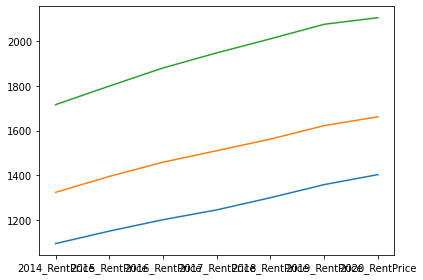

In [19]:
#plot 25, 50, 75 percentiles from 2011-2020
plt.plot(describe.iloc[4:7,3:].T)
plt.tight_layout()
plt.show()

In [20]:
df_rents_2014_2020.nunique()

RegionID          3243
RegionName        3243
SizeRank          2999
MsaName            101
2014_RentPrice    3105
2015_RentPrice    3081
2016_RentPrice    3052
2017_RentPrice    3043
2018_RentPrice    3043
2019_RentPrice    3026
2020_RentPrice    2958
dtype: int64

### Save Data

In [21]:
df_rents_2014_2020.to_csv(r'/Users/josephfrasca/Coding_Stuff/Springboard/Capstone_2/data/interim/df_rentPrices_2014_2020', index=False)

### Notes


In [22]:
#3 NaNs in 2014, fill with linear of other years for those zipcodes?

### Summary